In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


amsterdam = pd.read_csv('/Users/jordanmazza/Desktop/Udacity/GitHub/airbnb/amsterdam_listings.csv',
                        encoding='ISO-8859-1')
barcelona = pd.read_csv('/Users/jordanmazza/Desktop/Udacity/GitHub/airbnb/barcelona_listings.csv',
                        encoding='ISO-8859-1')
berlin = pd.read_csv('/Users/jordanmazza/Desktop/Udacity/GitHub/airbnb/berlin_listings.csv', encoding='ISO-8859-1')
dublin = pd.read_csv('/Users/jordanmazza/Desktop/Udacity/GitHub/airbnb/dublin_listings.csv', encoding='ISO-8859-1')
london = pd.read_csv('/Users/jordanmazza/Desktop/Udacity/GitHub/airbnb/london_listings.csv', encoding='ISO-8859-1')
paris = pd.read_csv('/Users/jordanmazza/Desktop/Udacity/GitHub/airbnb/paris_listings.csv', encoding='ISO-8859-1')
rome = pd.read_csv('/Users/jordanmazza/Desktop/Udacity/GitHub/airbnb/rome_listings.csv', encoding='ISO-8859-1')
venice = pd.read_csv('/Users/jordanmazza/Desktop/Udacity/GitHub/airbnb/venice_listings.csv', encoding='ISO-8859-1')

amsterdam.head()

,NAME,GEO_ID,COUNTRY,LATITUDE,LONGITUDE,TYPE,ACCOM,BATH,ROOMS,BEDS,PRICE
0,Luxurious & spacecious apartm. with garden 6sleep,NL,Netherlands,52.361173,4.866755,Entire home/apt,6,1.0,2.0,6.0,$145.00
1,Great app near Jordaan +2 bikes,NL,Netherlands,52.370237,4.859507,Entire home/apt,2,1.0,1.0,1.0,$88.00
2,"Trendy apartment, near Vondelpark",NL,Netherlands,52.362016,4.866872,Entire home/apt,2,1.0,1.0,1.0,$130.00
3,Modern apartment in Amsterdam West,NL,Netherlands,52.365826,4.858178,Entire home/apt,4,1.0,2.0,3.0,$110.00
4,(Balcony with) canal view Oud-West,NL,Netherlands,52.364179,4.864885,Entire home/apt,2,1.0,1.0,1.0,$115.00


In [72]:
list = [amsterdam, barcelona, berlin, dublin, london, paris, rome, venice]
for data in list:
    data.columns = map(str.lower, data.columns)
    

In [73]:
new = pd.concat(list)
df = new.drop(columns = 'name')
df.isnull().any()

geo_id       False
country      False
latitude     False
longitude    False
type         False
accom        False
bath          True
rooms         True
beds          True
price        False
dtype: bool

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200811 entries, 0 to 6026
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   geo_id     200811 non-null  object 
 1   country    200811 non-null  object 
 2   latitude   200811 non-null  float64
 3   longitude  200811 non-null  float64
 4   type       200811 non-null  object 
 5   accom      200811 non-null  int64  
 6   bath       200811 non-null  float64
 7   rooms      200811 non-null  float64
 8   beds       200811 non-null  float64
 9   price      200811 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 16.9+ MB


In [98]:
df.price = df.price.replace('[\$,]','',regex=True).astype(float)

In [117]:
df.dropna(axis=0, inplace=True)

In [126]:
df.beds.isnull().sum()

0

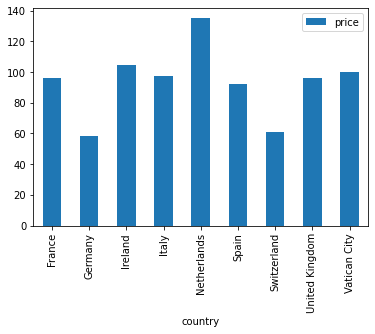

In [135]:
price = df.groupby('country', as_index=False)['price'].mean()

price.plot(kind='bar', x='country')
plt.xticks(rotation=90);